<a href="https://colab.research.google.com/github/qotmd01/DataScienceStudy/blob/main/_Pandas_Data_processing_Evo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 한번에 제대로 배우기




---



- 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)을 쉽게 처리
- 크기 변이성 DataFrame 및 고차원 객체에세 열을 삽입 및 삭제 가능
- 자동 및 명시적 데이터 정렬 : 객레츨 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series , DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할(split) , 적용(apply) , 결합(conbine)작업을 수행 할 수 있는 강력하고 유연한 group-by 함수 제공
- 누락된 데이터 또는 다른 Python 및 Numpy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 객체로 쉽게 변환
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 기능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계측정 라벨링(눈금당 여러 개의 라벨을 가질 수 있음)
- 플랫파일(csv 및 구분), Excel 파일, 데이터 페이스 로딩 및 초고속 HDFS 형식의 데이터 저장/로드에 사용되는 강력한 IO 도구
- 시계열 특정 기능 : 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window) 통계, 날짜 이동 및 지연

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.5.1'

## Pandas 객체


### Series 객체

In [2]:
s = pd.Series([0,0.25,0.5,0.75 , 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [3]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [4]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
s[1]

0.25

In [6]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [7]:
s = pd.Series([0,0.25,0.5,0.75, 1.0],
              index = ['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [8]:
s['c']

0.5

In [9]:
s[['c','d','e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [10]:
'b' in s

True

In [11]:
s = pd.Series([0,0.25,0.5,0.75,1.0], index = [2,4,6,8,10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [12]:
s[4]

0.25

In [13]:
s[2:]

/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/2428392343.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s[2:]


6     0.50
8     0.75
10    1.00
dtype: float64

In [14]:
s.unique() #Series에서 Unique한 값 출력

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [15]:
s.value_counts() #각 값의 개수 출력

0.00    1
0.25    1
0.50    1
0.75    1
1.00    1
dtype: int64

In [16]:
s.isin([0.25,0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [17]:
pop_tuple = { '서울특별시' : 9720846,
             '부산광역시' : 3404423,
             '인천광역시' : 2947217,
             '대구광역시' : 2427954,
             '대전광역시' : 1471040,
             '광주광역시' : 1455048}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [18]:
population['서울특별시']

9720846

In [19]:
population['서울특별시' : '인천광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

### DataFrame 객체

In [20]:
pd.DataFrame([{'A' : 2, 'B' : 4, 'D' : 3}, {'A' : 4, 'B' : 5, 'C' : 7}])

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [21]:
pd.DataFrame(np.random.rand(5,5),
             columns = ['A','B','C','D','E'],
             index = [1,2,3,4,5])

,A,B,C,D,E
1,0.254188,0.319787,0.541462,0.962280,0.030735
2,0.672703,0.967131,0.898003,0.482044,0.977392
3,0.911019,0.886999,0.377517,0.085285,0.726997
4,0.418068,0.883462,0.895220,0.843177,0.604302
5,0.827122,0.609599,0.019419,0.006027,0.234657


In [22]:
male_tuple = { '서울특별시' : 4732275 ,
             '부산광역시' : 1668618,
             '인천광역시' : 1476813,
             '대구광역시' : 1198815,
             '대전광역시' : 734441,
             '광주광역시' : 720060}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
dtype: int64

In [23]:
female_tuple = { '서울특별시' : 4988571 ,
             '부산광역시' : 1735805,
             '인천광역시' : 1470404,
             '대구광역시' : 1229139,
             '대전광역시' : 736599,
             '광주광역시' : 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [24]:
korea_df = pd.DataFrame({'인구수' : population,
                         '남자인구수' : male,
                         '여자인구수' : female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [25]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [26]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [27]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [28]:
korea_df['서울특별시' : '인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


### Index 객체

|클래스|설명|
|------|---|
|Index|일반적인 Index 객체이며, NumPy 배열 형식으로 축의 이름 표현|
|Int64Index|정수 값을 위한 Index|
|Multiindex|단일 속에 여러 단계 색인을 표현하는 계승적 Index 객체|
|DatetimeIndex|NumPy의 datetime64타입으로 타임스탬프 저장|
|PeriodIndex|기간 데이터를 위한 Index|


In [29]:
idx = pd.Index([2,4,6,8,10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [30]:
idx[1]

4

In [31]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [32]:
idx[-1::]

Int64Index([10], dtype='int64')

In [33]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [34]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

연산자|메소드|설명|
|------|---|---|
| |append|색인 객체를 추가한 새로운 색인 반환|
||difference|색인의 차집합 반환|
|&|intersection|색인의 교집합 반환|
|작대기|union|색인의 합집합 반환|
| |isin|색인지 존재하는지 여부를 불리언 배열로 반환|
| |delete|색인이 삭제된 새로운 색인 반환|
| |drop|값이 삭제된 새로운 색인 반환|
| |insert|색인이 추가된 새로운 색인 반환|
| |is_monotonic|색인이 단조성을 가지면 True|
| |is_unique|중복되는 색인이 없다면 True|
| |unique|색인에서 중복되는 요소를 제거하고 유일한 값만 반환|

In [35]:
idx1 = pd.Index([1,2,4,6,8])
idx2 = pd.Index([2,4,5,6,7])
print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1 - idx2)
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0)) #idx 기준으로 접근
print(idx1.drop(1)) # value 기준으로 접근
print(idx1 ^ idx2)  # 공통된 것을 뺀 나머지.

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/739140233.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  print(idx1 & idx2)
/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/739140233.py:9: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  print(idx1 | idx2)
/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/739140233.py:12: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  print(idx1 ^ idx2)  # 공통된 것을 뺀 나머지.




---



## 인덱싱(Indexing)

In [36]:
s = pd.Series([0,0.25,0.5,0.75,1.0],
              index = ['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [37]:
s['b']

0.25

In [38]:
'b' in s

True

In [39]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [40]:
list(s.items())  # .items()는 zip형태 -> list로 변환.

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [41]:
s['f'] = 1.25 # 값 추가.
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [42]:
s['a' : 'd']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [43]:
s[0 : 4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [44]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [45]:
s[['a','c','e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

- iloc: 순서(idx)기반 접근
- loc : idx value기반 접근
- reindex : 다시 idx부여 , method 선택가능

In [46]:
s = pd.Series(['a','b','c','d','e'],
              index = [1,3,5,7,9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [47]:
s[1]

'a'

In [48]:
s[2:4]

/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/2621506025.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s[2:4]


5    c
7    d
dtype: object

In [49]:
s.iloc[1]

'b'

In [50]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [51]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [52]:
s.reindex(range(10), method = 'bfill') # bfill : Nan을 전값으로 채움

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱
|사용방법|설명|
|------|---|
|df[val]|하나의 Col 또는 여러 Col을 선택|
|df.loc[val]|Idx Value로 Row 선택|
|df.loc[:,val]|Idx Value로 Col선택|
|df.iloc[where]|정수 색인으로 Row 선택|
|df.iloc[:,where]|정수 색인으로 Col 선택|
|df.iloc[where_i,where_j]|정수 색인으로 Row,Col 선택|
|df.at[val_i,val_j]|Idx Value로 단일 Row,Col 선택|
|df.iat[where_i,where_j]|정수 색인으로 단일 Row,Col 선택|
|reindex|하나 이상의 축을 새로운 색인으로 재색인
|get_value,set_value|Row와 Col의 이름으로 값 선택|




In [53]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [54]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [55]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [56]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [57]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [58]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시     99.707032
광주광역시     97.968946
Name: 남여비율, dtype: float64

In [59]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [60]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [61]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [62]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
Name: 인구수, dtype: int64

In [63]:
korea_df.loc[:'인천광역시' , : '남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [64]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [65]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [66]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [67]:
korea_df.loc[korea_df.남여비율 > 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [68]:
korea_df.loc[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [69]:
korea_df.iloc[:3, : 2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [70]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [71]:
idx_tuples = [('서울특별시', 2010), ('서울특별시' , 2020),
              ('부산광역시', 2010), ('부산광역시' , 2020),
              ('인천광역시', 2010), ('인천광역시' , 2020),
              ('대구광역시', 2010), ('대구광역시' , 2020),
              ('대전광역시', 2010), ('대전광역시' , 2020),
              ('광주광역시', 2010), ('광주광역시' , 2020)]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [72]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217,
              2511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [73]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [74]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [75]:
population[:,2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [76]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [77]:
korea_mdf = population.unstack() # 다중인덱스로 만들어진 Series를 DataFrame으로 변환
korea_mdf


,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [78]:
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [79]:
male_tuple = [5111259,4732275,
              1773170,1668618,
              1390356,1476813,
              1255245,1198815,
              753648,734441,
              721780,720060]
male_tuple

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [80]:
korea_mdf = pd.DataFrame({'총인구수' : population ,'남자인구수' : male_tuple})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [81]:
female_tuple = [5201286,4988571,
                1794740,1735805,
                1367940,1470404,
                1256431,1229139,
                750016,736599,
                732856,734988]
female_tuple

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [82]:
korea_mdf = pd.DataFrame({'총인구수' : population,
                          '남자인구수' : male_tuple,
                          '여자인구수' : female_tuple})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720060   734988

In [83]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     97.968946
dtype: float64

In [84]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [85]:
korea_mdf = pd.DataFrame({'총인구수' : population,
                          '남자인구수' : male_tuple,
                          '여자인구수' : female_tuple,
                          '남여비율' : ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

#### 다중 인덱스 생성

In [86]:
df = pd.DataFrame(np.random.rand(6,3),
                  index = [['a','a','b','b','c','c'], [1,2,1,2,1,2]],
                  columns = ['c1','c2','c3'])
df

c1        c2        c3
a 1  0.057662  0.300775  0.121461
  2  0.073003  0.267402  0.073765
b 1  0.005927  0.552776  0.601242
  2  0.482784  0.406266  0.374821
c 1  0.880472  0.316545  0.901813
  2  0.694141  0.130099  0.450514

In [87]:
pd.MultiIndex.from_arrays([['a','a','b','b','c','c'], [1,2,1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [88]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2),('c',1),('c',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [89]:
pd.MultiIndex.from_product([['a','b','c'],[1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [90]:
pd.MultiIndex(levels = [['a','b','c'],[1,2]],
              codes = [[0,0,1,1,2,2],[0,1,0,1,0,1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [91]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [92]:
population.index.names = ['행정구역' ,'년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [93]:
idx = pd.MultiIndex.from_product([['a','b','c'], [1,2]],
                                 names = ['name1','name2'])
cols = pd.MultiIndex.from_product([['c1','c2','c3'] , [1,2]],
                                  names = ['col_name1' , 'col_name2'])
data = np.round(np.random.randn(6,6),2)
mdf = pd.DataFrame(data, index = idx, columns = cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.75 -0.79 -0.09 -0.08 -0.48 -0.80
      2      0.69  0.55 -0.93 -0.34 -1.33 -1.22
b     1     -0.23  2.85 -0.40 -0.92  1.18 -2.37
      2     -0.14  1.48 -0.01 -1.47 -0.32 -2.06
c     1     -0.21 -0.46 -1.04  0.69 -0.72 -2.20
      2     -0.53  0.89  0.30 -0.82 -1.20 -0.47

In [94]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -0.09 -0.08
      2     -0.93 -0.34
b     1     -0.40 -0.92
      2     -0.01 -1.47
c     1     -1.04  0.69
      2      0.30 -0.82

#### 인덱싱 및 슬라이싱

In [95]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [96]:
population['인천광역시', 2010]

2758296

In [97]:
population[ :, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [98]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [99]:
population[['대구광역시' , '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [100]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.75 -0.79 -0.09 -0.08 -0.48 -0.80
      2      0.69  0.55 -0.93 -0.34 -1.33 -1.22
b     1     -0.23  2.85 -0.40 -0.92  1.18 -2.37
      2     -0.14  1.48 -0.01 -1.47 -0.32 -2.06
c     1     -0.21 -0.46 -1.04  0.69 -0.72 -2.20
      2     -0.53  0.89  0.30 -0.82 -1.20 -0.47

In [101]:
mdf['c2',1]

name1  name2
a      1       -0.09
       2       -0.93
b      1       -0.40
       2       -0.01
c      1       -1.04
       2        0.30
Name: (c2, 1), dtype: float64

In [102]:
mdf.iloc[:3,:4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1      0.75 -0.79 -0.09 -0.08
      2      0.69  0.55 -0.93 -0.34
b     1     -0.23  2.85 -0.40 -0.92

In [103]:
mdf.loc[:,('c2',1)]

name1  name2
a      1       -0.09
       2       -0.93
b      1       -0.40
       2       -0.01
c      1       -1.04
       2        0.30
Name: (c2, 1), dtype: float64

In [104]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:,2], idx_slice[:,2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,0.55,-0.34,-1.22
b,2,1.48,-1.47,-2.06
c,2,0.89,-0.82,-0.47


#### 다중 인덱스 재정렬

In [105]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [106]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

In [107]:
korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [108]:
korea_mdf['서울특별시' : '인천광역시']

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [109]:
korea_mdf.unstack(level = 0)

총인구수                                                 남자인구수           \
행정구역    광주광역시    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시   광주광역시    대구광역시   
년도                                                                             
2010  1454636  2511676  1503664  2567910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...   여자인구수                                  남여비율  \
행정구역   대전광역시    부산광역시  ...   대전광역시    부산광역시    서울특별시    인천광역시      광주광역시   
년도                     ...                                                 
2010  753648  1773170  ...  750016  1794740  5201286  1367940  98.488653   
2020  734441  1668618  ...  736599  1735805  4988571  1470404  97.968946   

                                                               
행정구역      대구광역시       대전광역시      부산광역시      서울특별시       인천광역시  
년도                                                             
2010  99.905606  100.484256  98.798155  98.269140  101.638668  
2020  97.532907   99.707032  96.129346  94.862336  100.435867  

[2 rows x 24 columns]

In [110]:
korea_mdf.unstack(level = 1)

총인구수             남자인구수             여자인구수                 남여비율  \
년도         2010     2020     2010     2020     2010     2020        2010   
행정구역                                                                       
광주광역시   1454636  1455048   721780   720060   732856   734988   98.488653   
대구광역시   2511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전광역시   1503664  1471040   753648   734441   750016   736599  100.484256   
부산광역시   2567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울특별시  10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천광역시   2758296  2947217  1390356  1476813  1367940  1470404  101.638668   

                   
년도           2020  
행정구역               
광주광역시   97.968946  
대구광역시   97.532907  
대전광역시   99.707032  
부산광역시   96.129346  
서울특별시   94.862336  
인천광역시  100.435867

In [111]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총인구수     1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.328560e+05
             남여비율     9.848865e+01
       2020  총인구수     1.455048e+06
             남자인구수    7.200600e+05
             여자인구수    7.349880e+05
             남여비율     9.796895e+01
대구광역시  2010  총인구수     2.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     9.990561e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     9.753291e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     1.004843e+02
       2020  총인구수     1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남여비율     9.970703e+01
부산광역시  2010  총인구수     2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
 

In [112]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [113]:
idx_flat = korea_mdf.reset_index(level = 0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,광주광역시,1454636,721780,732856,98.488653
2020,광주광역시,1455048,720060,734988,97.968946
2010,대구광역시,2511676,1255245,1256431,99.905606
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,734441,736599,99.707032
2010,부산광역시,2567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140


In [114]:
idx_flat = korea_mdf.reset_index(level = (0,1))
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,광주광역시,2010,1454636,721780,732856,98.488653
1,광주광역시,2020,1455048,720060,734988,97.968946
2,대구광역시,2010,2511676,1255245,1256431,99.905606
3,대구광역시,2020,2427954,1198815,1229139,97.532907
4,대전광역시,2010,1503664,753648,750016,100.484256
5,대전광역시,2020,1471040,734441,736599,99.707032
6,부산광역시,2010,2567910,1773170,1794740,98.798155
7,부산광역시,2020,3404423,1668618,1735805,96.129346
8,서울특별시,2010,10312545,5111259,5201286,98.269140
9,서울특별시,2020,9720846,4732275,4988571,94.862336


In [115]:
idx_flat.set_index(['행정구역','년도'])

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [116]:
s = pd.Series(np.random.randint(0,10,5))
s

0    5
1    8
2    6
3    6
4    4
dtype: int64

In [117]:
df = pd.DataFrame(np.random.randint(0,10,(3,3)),
                  columns = ['A','B','C'])
df

,A,B,C
0,0,5,8
1,8,7,8
2,3,4,9


In [118]:
np.exp(s)

0     148.413159
1    2980.957987
2     403.428793
3     403.428793
4      54.598150
dtype: float64

In [119]:
np.cos(df * np.pi / 4)

,A,B,C
0,1.000000,-0.707107,1.000000
1,1.000000,0.707107,1.000000
2,-0.707107,-1.000000,0.707107


In [120]:
s1 = pd.Series([1,3,5,7,9], index = [0,1,2,3,4])
s2 = pd.Series([2,5,6,8,10], index = [1,2,3,4,5])
s1 + s2

0     NaN
1     5.0
2    10.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [121]:
s1.add(s2, fill_value = 0) #NaN 값을 fill_value로 대체후 연산

0     1.0
1     5.0
2    10.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [122]:
df1 = pd.DataFrame(np.random.randint(0,20,(3,3)),
                   columns = list('ACD'))
df1

,A,C,D
0,17,8,2
1,11,18,10
2,13,7,15


In [123]:
df2 = pd.DataFrame(np.random.randint(0,20,(5,5)),
                   columns = list('BAECD'))
df2

,B,A,E,C,D
0,1,17,9,16,16
1,8,4,14,4,15
2,11,1,16,11,15
3,11,12,9,2,8
4,14,16,9,14,18


In [124]:
df1 + df2

,A,B,C,D,E
0,34.0,NaN,24.0,18.0,NaN
1,15.0,NaN,22.0,25.0,NaN
2,14.0,NaN,18.0,30.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [125]:
fvalue = df1.stack().mean()
df1.add(df2, fill_value = fvalue)

,A,B,C,D,E
0,34.000000,12.222222,24.000000,18.000000,20.222222
1,15.000000,19.222222,22.000000,25.000000,25.222222
2,14.000000,22.222222,18.000000,30.000000,27.222222
3,23.222222,22.222222,13.222222,19.222222,20.222222
4,27.222222,25.222222,25.222222,29.222222,20.222222


### 연산자 범용 함수

|Python 연산자|Pandas 메소드|
|-----------|------------|
|+|add,radd|
|-|sub,rsub,subtract|
|*|mul,rmul,multiply|
|/|truediv,div,rdiv,divide|
|//|floordiv,rfloordiv|
|%|mod|
|**|pow,rpow|


#### add()

In [126]:
a = np.random.randint(1,10,(3,3))

In [127]:
a

array([[1, 8, 9],
       [7, 5, 2],
       [5, 6, 3]])

In [128]:
a + a[0]

array([[ 2, 16, 18],
       [ 8, 13, 11],
       [ 6, 14, 12]])

In [129]:
df = pd.DataFrame(a , columns = list('ABC'))
df

,A,B,C
0,1,8,9
1,7,5,2
2,5,6,3


In [130]:
df + df.iloc[0]

,A,B,C
0,2,16,18
1,8,13,11
2,6,14,12


In [131]:
df.add(df.iloc[0])

,A,B,C
0,2,16,18
1,8,13,11
2,6,14,12


#### sub() / subtract()

In [132]:
a

array([[1, 8, 9],
       [7, 5, 2],
       [5, 6, 3]])

In [133]:
a - a[0]

array([[ 0,  0,  0],
       [ 6, -3, -7],
       [ 4, -2, -6]])

In [134]:
df

,A,B,C
0,1,8,9
1,7,5,2
2,5,6,3


In [135]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,6,-3,-7
2,4,-2,-6


In [136]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,6,-3,-7
2,4,-2,-6


In [137]:
df.subtract(df['B'] , axis = 0)

,A,B,C
0,-7,0,1
1,2,0,-3
2,-1,0,-3


#### mul() / multply()




In [138]:
a

array([[1, 8, 9],
       [7, 5, 2],
       [5, 6, 3]])

In [139]:
a * a[1]

array([[ 7, 40, 18],
       [49, 25,  4],
       [35, 30,  6]])

In [140]:
df

,A,B,C
0,1,8,9
1,7,5,2
2,5,6,3


In [141]:
df * df.iloc[1]

,A,B,C
0,7,40,18
1,49,25,4
2,35,30,6


In [142]:
df.mul(df.iloc[1])

,A,B,C
0,7,40,18
1,49,25,4
2,35,30,6


In [143]:
df.multiply(df.iloc[2])

,A,B,C
0,5,48,27
1,35,30,6
2,25,36,9


#### truediv() /  div() / divide() / floordiv()

In [144]:
a

array([[1, 8, 9],
       [7, 5, 2],
       [5, 6, 3]])

In [145]:
a / a[0]

array([[1.        , 1.        , 1.        ],
       [7.        , 0.625     , 0.22222222],
       [5.        , 0.75      , 0.33333333]])

In [146]:
df

,A,B,C
0,1,8,9
1,7,5,2
2,5,6,3


In [147]:
df / df.iloc[0]

,A,B,C
0,1.0,1.000,1.000000
1,7.0,0.625,0.222222
2,5.0,0.750,0.333333


In [148]:
df.truediv(df.iloc[0])

,A,B,C
0,1.0,1.000,1.000000
1,7.0,0.625,0.222222
2,5.0,0.750,0.333333


In [149]:
df.div(df.iloc[1])

,A,B,C
0,0.142857,1.6,4.5
1,1.000000,1.0,1.0
2,0.714286,1.2,1.5


In [150]:
df.divide(df.iloc[2])

,A,B,C
0,0.2,1.333333,3.000000
1,1.4,0.833333,0.666667
2,1.0,1.000000,1.000000


In [151]:
a // a[0]

array([[1, 1, 1],
       [7, 0, 0],
       [5, 0, 0]])

In [152]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,7,0,0
2,5,0,0


#### mod()

In [153]:
a

array([[1, 8, 9],
       [7, 5, 2],
       [5, 6, 3]])

In [154]:
a % a[0]

array([[0, 0, 0],
       [0, 5, 2],
       [0, 6, 3]])

In [155]:
df

,A,B,C
0,1,8,9
1,7,5,2
2,5,6,3


In [156]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,0,5,2
2,0,6,3


#### pow()

In [157]:
a

array([[1, 8, 9],
       [7, 5, 2],
       [5, 6, 3]])

In [158]:
a ** a[0]

array([[        1,  16777216, 387420489],
       [        7,    390625,       512],
       [        5,   1679616,     19683]])

In [159]:
df

,A,B,C
0,1,8,9
1,7,5,2
2,5,6,3


In [160]:
df.pow(df.iloc[0])

,A,B,C
0,1,16777216,387420489
1,7,390625,512
2,5,1679616,19683


In [161]:
row = df.iloc[0, ::2]
row

A    1
C    9
Name: 0, dtype: int64

In [162]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,6.0,NaN,-7.0
2,4.0,NaN,-6.0


### 정렬(Sort)

In [163]:
s = pd.Series(range(5), index = ['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [164]:
s.sort_index() # index Value 기준으로 정렬

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [165]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [166]:
df = pd.DataFrame(np.random.randint(0,10,(4,4)),
                  index = [2,4,1,3],
                  columns = list('BDAC'))
df

,B,D,A,C
2,2,7,9,8
4,3,9,8,8
1,8,9,9,1
3,9,0,7,5


In [167]:
df.sort_index()

,B,D,A,C
1,8,9,9,1
2,2,7,9,8
3,9,0,7,5
4,3,9,8,8


In [168]:
df.sort_index(axis = 1)

,A,B,C,D
2,9,2,8,7
4,8,3,8,9
1,9,8,1,9
3,7,9,5,0


In [169]:
df.sort_values(by = 'A')

,B,D,A,C
3,9,0,7,5
4,3,9,8,8
2,2,7,9,8
1,8,9,9,1


In [170]:
df.sort_values(by = ['A','C'])

,B,D,A,C
3,9,0,7,5
4,3,9,8,8
1,8,9,9,1
2,2,7,9,8


### 순위(Ranking)


In [171]:
s = pd.Series([-2,4,7,3,0,7,5,-4,2,6])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
dtype: int64

In [172]:
s.rank()

0    2.0
1    6.0
2    9.5
3    5.0
4    3.0
5    9.5
6    7.0
7    1.0
8    4.0
9    8.0
dtype: float64

In [173]:
s.rank(method = 'first') #동일한 값인 경우, 먼저 등장한 element가 높은 원소

0     2.0
1     6.0
2     9.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

In [174]:
s.rank(method = 'max')

0     2.0
1     6.0
2    10.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

### 고성능 연산

In [175]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [176]:
%timeit df1 + df2 + df3 + df4

30 ms ± 766 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [177]:
%timeit pd.eval('df1 + df2 + df3 + df4')

32.1 ms ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [178]:
%timeit df1 * -df2 / (-df3 * df4)

49.2 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [179]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

49.4 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [180]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

33.7 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [181]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

32.9 ms ± 662 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [182]:
df = pd.DataFrame(np.random.rand(1000000,5), columns = ['A','B','C','D','E'])
df.head() # 앞에서 5개 출력

,A,B,C,D,E
0,0.333136,0.717012,0.659666,0.944524,0.324639
1,0.639644,0.063380,0.361561,0.326066,0.578590
2,0.082515,0.978228,0.467978,0.873298,0.559071
3,0.141577,0.969713,0.646788,0.851080,0.390727
4,0.435669,0.178153,0.704905,0.636665,0.234689


In [183]:
%timeit df['A'] + df['B'] / df['C'] - df['D']  * df['E']

5.9 ms ± 95 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [184]:
%timeit pd.eval('df.A + df.B / df.C - df.D * df.E')

6.54 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [185]:
%timeit df.eval('A * B / C - D * E')

7.93 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [186]:
df.eval('R = A + B / C - D * E' , inplace = True)
df.head()

,A,B,C,D,E,R
0,0.333136,0.717012,0.659666,0.944524,0.324639,1.113439
1,0.639644,0.063380,0.361561,0.326066,0.578590,0.626280
2,0.082515,0.978228,0.467978,0.873298,0.559071,1.684609
3,0.141577,0.969713,0.646788,0.851080,0.390727,1.308313
4,0.435669,0.178153,0.704905,0.636665,0.234689,0.538984


In [187]:
col_mean = df.mean(1)
df['A'] + col_mean

0         1.015205
1         1.072231
2         0.856798
3         0.859610
4         0.890513
            ...   
999995    1.840499
999996    1.897766
999997    1.336321
999998    1.365384
999999    1.005908
Length: 1000000, dtype: float64

In [188]:
df.eval('A + @col_mean')

0         1.015205
1         1.072231
2         0.856798
3         0.859610
4         0.890513
            ...   
999995    1.840499
999996    1.897766
999997    1.336321
999998    1.365384
999999    1.005908
Length: 1000000, dtype: float64

In [189]:
df[(df.A < 0.5) & (df.B < 0.5) & ( df.C > 0.5)]

,A,B,C,D,E,R
4,0.435669,0.178153,0.704905,0.636665,0.234689,0.538984
7,0.241507,0.165156,0.802334,0.713086,0.111440,0.367885
16,0.239524,0.445462,0.733685,0.274579,0.339651,0.753419
24,0.234746,0.349872,0.606581,0.966175,0.942692,-0.099266
47,0.204344,0.092508,0.818458,0.422238,0.075182,0.285627
...,...,...,...,...,...,...
999941,0.496047,0.141664,0.703664,0.515468,0.456039,0.462297
999961,0.425101,0.110717,0.597022,0.115611,0.974675,0.497866
999969,0.025599,0.123060,0.555071,0.851842,0.666569,-0.320512
999970,0.123984,0.122007,0.583744,0.812314,0.764881,-0.288331


In [190]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & ( df.C > 0.5)]')

,A,B,C,D,E,R
4,0.435669,0.178153,0.704905,0.636665,0.234689,0.538984
7,0.241507,0.165156,0.802334,0.713086,0.111440,0.367885
16,0.239524,0.445462,0.733685,0.274579,0.339651,0.753419
24,0.234746,0.349872,0.606581,0.966175,0.942692,-0.099266
47,0.204344,0.092508,0.818458,0.422238,0.075182,0.285627
...,...,...,...,...,...,...
999941,0.496047,0.141664,0.703664,0.515468,0.456039,0.462297
999961,0.425101,0.110717,0.597022,0.115611,0.974675,0.497866
999969,0.025599,0.123060,0.555071,0.851842,0.666569,-0.320512
999970,0.123984,0.122007,0.583744,0.812314,0.764881,-0.288331


In [191]:
df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

,A,B,C,D,E,R
4,0.435669,0.178153,0.704905,0.636665,0.234689,0.538984
7,0.241507,0.165156,0.802334,0.713086,0.111440,0.367885
16,0.239524,0.445462,0.733685,0.274579,0.339651,0.753419
24,0.234746,0.349872,0.606581,0.966175,0.942692,-0.099266
47,0.204344,0.092508,0.818458,0.422238,0.075182,0.285627
...,...,...,...,...,...,...
999941,0.496047,0.141664,0.703664,0.515468,0.456039,0.462297
999961,0.425101,0.110717,0.597022,0.115611,0.974675,0.497866
999969,0.025599,0.123060,0.555071,0.851842,0.666569,-0.320512
999970,0.123984,0.122007,0.583744,0.812314,0.764881,-0.288331


In [192]:
col_mean = df['D'].mean()

In [193]:
df[(df.A < col_mean) & (df.B < col_mean)]

,A,B,C,D,E,R
4,0.435669,0.178153,0.704905,0.636665,0.234689,0.538984
7,0.241507,0.165156,0.802334,0.713086,0.111440,0.367885
11,0.429675,0.339149,0.005520,0.553231,0.792387,61.429501
13,0.028546,0.075543,0.206669,0.005883,0.594653,0.390572
16,0.239524,0.445462,0.733685,0.274579,0.339651,0.753419
...,...,...,...,...,...,...
999970,0.123984,0.122007,0.583744,0.812314,0.764881,-0.288331
999971,0.364444,0.044687,0.262072,0.200406,0.319390,0.470950
999972,0.232094,0.002086,0.329299,0.783551,0.688134,-0.300759
999985,0.192684,0.376517,0.829614,0.811644,0.876461,-0.064845


In [194]:
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
4,0.435669,0.178153,0.704905,0.636665,0.234689,0.538984
7,0.241507,0.165156,0.802334,0.713086,0.111440,0.367885
11,0.429675,0.339149,0.005520,0.553231,0.792387,61.429501
13,0.028546,0.075543,0.206669,0.005883,0.594653,0.390572
16,0.239524,0.445462,0.733685,0.274579,0.339651,0.753419
...,...,...,...,...,...,...
999970,0.123984,0.122007,0.583744,0.812314,0.764881,-0.288331
999971,0.364444,0.044687,0.262072,0.200406,0.319390,0.470950
999972,0.232094,0.002086,0.329299,0.783551,0.688134,-0.300759
999985,0.192684,0.376517,0.829614,0.811644,0.876461,-0.064845


## 데이터 결합

### Concat() / Append()

- pd.concat(데이터프레임리스트) : 데이터프레임을 물리적으로 이어 붙여주는 함수, 
- default : axis = 0, join = 'inner'

In [195]:
s1 = pd.Series(['A','B'] , index = [1,2])
s2 = pd.Series(['C','D'] , index = [3,4])
pd.concat([s1,s2])

1    A
2    B
3    C
4    D
dtype: object

In [196]:
def create_df(cols, idx):
    data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
    return pd.DataFrame(data, idx)

In [197]:
df1 = create_df('AB',[1,2])
df1

,A,B
1,a1,b1
2,a2,b2


In [198]:
df2 = create_df('AB' , [3,4])
df2

,A,B
3,a3,b3
4,a4,b4


In [199]:
pd.concat([df1,df2]) #아래에 결합

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [200]:
df3 = create_df('AB', [0,1])
df3

,A,B
0,a0,b0
1,a1,b1


In [201]:
df4 = create_df('CD', [0,1])
df4

,C,D
0,c0,d0
1,c1,d1


In [202]:
pd.concat([df3,df4]) #결합될수 없는 Column의 누락값은 NaN으로 

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [203]:
#pd.concat([df1,df3], verify_integrity= True) verify_intergirty -> 결합 하면 안된다는 에러를 출력하게...

In [204]:
pd.concat([df1,df3], ignore_index = True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [205]:
pd.concat([df1,df3], keys = ['X','Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [206]:
df5 = create_df('ABC' , [1,2])
df6 = create_df('BCD' , [3,4])
pd.concat([df5,df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [207]:
pd.concat([df5,df6], join = 'inner') # inner : 교집합인 column끼리만 결합

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [208]:
df5.append(df6)

/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/551904218.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5.append(df6)


,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [209]:
pd.concat([df3,df4] ,axis = 1) #idx기준으로 결합.

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [210]:
pd.concat([df1,df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


### 병합과 조인

- pd.merge(): 두 데이터 플레임을 각 데이터에 존재하는 고유값(key)를 기준으로 병합
- default : pd.merge(df_left, df_right, how='inner', on=None)
- on=None이면 공통 열이름을 기준으로 조인

In [211]:
df1 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '학과' : ['경영학과' , '교육학과' , '컴퓨터학과' , '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [212]:
df2 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '입혁년도' : [2012, 2016, 1019, 2020]})
df2

,학생,입혁년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,1019
3,김유신,2020


In [213]:
df3 = pd.merge(df1,df2)
df3

,학생,학과,입혁년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,1019
3,김유신,통계학과,2020


In [214]:
df4 = pd.DataFrame({'학과' : ['경영학과' , '교육학과' , '컴퓨터학과' , '통계학과'],
                    '학과장' : ['황희', '장영실' , '안창호', '정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [215]:
pd.merge(df3,df4)

,학생,학과,입혁년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,1019,안창호
3,김유신,통계학과,2020,정약용


In [216]:
df5 = pd.DataFrame({'학과' : ['경영학과' , '교육학과' , '교육학과' , '컴퓨터학과' , '컴퓨터학과' , '통계학과'],
                    '과목' : ['경영개론' , '기초수학' , '물리학', '프로그래밍', '운영체제' , '확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [217]:
pd.merge(df1,df5)

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [218]:
pd.merge(df1, df2, on = '학생')

,학생,학과,입혁년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,1019
3,김유신,통계학과,2020


In [219]:
df6 = pd.DataFrame({'이름' : ['홍길동','이순신', '임꺽정', '김유신'],
                    '성적' : ['A', 'A+' , 'B' , 'A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [220]:
pd.merge(df1,df6, left_on = '학생' , right_on = '이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


In [221]:
pd.merge(df1,df6, left_on = '학생' , right_on = '이름').drop('이름' , axis = 1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,A+


In [222]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [223]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [224]:
mdf2

,입혁년도
학생,
홍길동,2012
이순신,2016
임꺽정,1019
김유신,2020


In [225]:
pd.merge(mdf1,mdf2, left_index = True, right_index = True)

,학과,입혁년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,1019
김유신,통계학과,2020


- join() : merge()를 기반으로 만들어짐. join()은 행 인덱스를 기준으로 결합
- default : Dataframe1.join(Dataframe2. how='left')

In [226]:
mdf1.join(mdf2)

,학과,입혁년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,1019
김유신,통계학과,2020


In [227]:
pd.merge(mdf1, df6, left_index = True, right_on = '이름').set_index('이름')

,학과,성적
이름,,
홍길동,경영학과,A
이순신,교육학과,A+
임꺽정,컴퓨터학과,B
김유신,통계학과,A+


In [228]:
df7 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정'],
                    '주문음식' : ['햄버거' , '피자' , '짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [229]:
df8 = pd.DataFrame({'이름' : ['홍길동', '이순신', '김유신'],
                    '주문음료' : ['콜라' , '사이다' , '커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [230]:
pd.merge(df7,df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [231]:
pd.merge(df7,df8, how = 'outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [232]:
pd.merge(df7,df8, how = 'left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [233]:
pd.merge(df7,df8, how = 'right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [234]:
df9 = pd.DataFrame({'이름' : ['홍길동' , '이순신' , '임꺽정' , '김유신'],
                    '순위' : [3,2,4,1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [235]:
df10 = pd.DataFrame({'이름' : ['홍길동' , '이순신' , '임꺽정' , '김유신'],
                    '순위' : [4,1,3,2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [236]:
pd.merge(df9,df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [237]:
pd.merge(df9,df10, on = '이름' , suffixes = ["_인기" , "_성적"]).set_index('이름')

,순위_인기,순위_성적
이름,,
홍길동,3,4
이순신,2,1
임꺽정,4,3
김유신,1,2


## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)

|집계|설명|
|---|---|
|count|전체 개수|
|head,tail|앞/뒤항목 일부 반환|
|describe|Series,DataFrame의 각 컬럼에 대한 요약 통계|
|min,max|최소,최대값|
|cummin,cummax|누적 최소,최대값|
|argmin,argmax|최소/최대값의 index 위치|
|idxmin,idxmax|최소/최대값의 index Value|
|mean,median|평균값, 중앙값|
|std,var|표준편차, 분산|
|skew|왜도(skewness)값 계산|
|kurt|첨도(kurtosis)값 계산|
|mad|절대 평균 편차(Mean Absolute Deviation)|
|sum,cumsum|전체 항목 합, 누적합|
|prod,cumprod|전체 항목곱, 누적곱|
|quantile|0부터 1까지의 분위수 계산|
|diff|1차 산술차 계산|
|pct_change|퍼센트 변화율 계산|
|corr,cov|상관관계,공분산 계산|


In [238]:
df = pd.DataFrame([[1,1.2,np.nan],
                   [2.4,5.5,4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44 , -3.1 , -4.1]],
                  index = [1,2,3,4],
                  columns = ['A','B','C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [239]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [240]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [241]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [242]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [243]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [244]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [245]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [246]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [247]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [248]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [249]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [250]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [251]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [252]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [253]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [254]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [255]:
df['A'].value_counts()

1.00    1
2.40    1
0.44    1
Name: A, dtype: int64

### GroupBy 연산

데이터 프레임에 .groupby(컬럼) + 통계함수로 그룹별 통계량을 확인

In [256]:
df = pd.DataFrame({'c1' : ['a','b','b','c','c','d','b'],
                   'c2' : ['A','B','B','A','D','C','C'],
                    'c3' : np.random.randint(7),
                   'c4' : np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,4,0.839380
1,b,B,4,0.344616
2,b,B,4,0.148805
3,c,A,4,0.872843
4,c,D,4,0.247887
5,d,C,4,0.280001
6,b,C,4,0.315852


In [257]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [258]:
df['c3'].groupby(df['c1']) #집계값을 설정해줘야함

In [259]:
df['c3'].groupby(df['c1']).mean()

c1
a    4.0
b    4.0
c    4.0
d    4.0
Name: c3, dtype: float64

In [260]:
df['c4'].groupby(df['c2']).std()

c2
A    0.023662
B    0.138459
C    0.025351
D         NaN
Name: c4, dtype: float64

In [261]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.839380
b   B     0.246710
    C     0.315852
c   A     0.872843
    D     0.247887
d   C     0.280001
Name: c4, dtype: float64

In [262]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack() # Series -> DataFrame

c2,A,B,C,D
c1,,,,
a,0.839380,NaN,NaN,NaN
b,NaN,0.24671,0.315852,NaN
c,0.872843,NaN,NaN,0.247887
d,NaN,NaN,0.280001,NaN


In [263]:
df.groupby('c1').mean()

/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/3759143062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('c1').mean()


,c3,c4
c1,,
a,4.0,0.839380
b,4.0,0.269758
c,4.0,0.560365
d,4.0,0.280001


In [264]:
df.groupby(['c1','c2']).mean()

c3        c4
c1 c2               
a  A   4.0  0.839380
b  B   4.0  0.246710
   C   4.0  0.315852
c  A   4.0  0.872843
   D   4.0  0.247887
d  C   4.0  0.280001

In [265]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
b   B     2
    C     1
c   A     1
    D     1
d   C     1
dtype: int64

In [266]:
for c1, group in df.groupby(['c1']):
    print(c1)
    print(group)

a
  c1 c2  c3       c4
0  a  A   4  0.83938
b
  c1 c2  c3        c4
1  b  B   4  0.344616
2  b  B   4  0.148805
6  b  C   4  0.315852
c
  c1 c2  c3        c4
3  c  A   4  0.872843
4  c  D   4  0.247887
d
  c1 c2  c3        c4
5  d  C   4  0.280001


/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/2325199124.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for c1, group in df.groupby(['c1']):


In [267]:
for (c1,c2), group in df.groupby(['c1', 'c2']):
    print((c1,c2))
    print(group)

('a', 'A')
  c1 c2  c3       c4
0  a  A   4  0.83938
('b', 'B')
  c1 c2  c3        c4
1  b  B   4  0.344616
2  b  B   4  0.148805
('b', 'C')
  c1 c2  c3        c4
6  b  C   4  0.315852
('c', 'A')
  c1 c2  c3        c4
3  c  A   4  0.872843
('c', 'D')
  c1 c2  c3        c4
4  c  D   4  0.247887
('d', 'C')
  c1 c2  c3        c4
5  d  C   4  0.280001


In [268]:
df.groupby(['c1','c2'])[['c4']].mean() #c4만 확인하고 싶은경우

c4
c1 c2          
a  A   0.839380
b  B   0.246710
   C   0.315852
c  A   0.872843
   D   0.247887
d  C   0.280001

In [269]:
df.groupby('c1')['c3'].quantile()

c1
a    4.0
b    4.0
c    4.0
d    4.0
Name: c3, dtype: float64

In [270]:
df.groupby('c1')['c3'].count()

c1
a    1
b    3
c    2
d    1
Name: c3, dtype: int64

In [271]:
df.groupby('c1')['c4'].median()

c1
a    0.839380
b    0.315852
c    0.560365
d    0.280001
Name: c4, dtype: float64

In [272]:
df.groupby('c1')['c4'].std()

c1
a         NaN
b    0.105731
c    0.441911
d         NaN
Name: c4, dtype: float64

In [273]:
df.groupby(['c1','c2'])['c4'].agg(['mean','min','max']) # 여러 집계함수를 한번에.

mean       min       max
c1 c2                              
a  A   0.839380  0.839380  0.839380
b  B   0.246710  0.148805  0.344616
   C   0.315852  0.315852  0.315852
c  A   0.872843  0.872843  0.872843
   D   0.247887  0.247887  0.247887
d  C   0.280001  0.280001  0.280001

In [274]:
df.groupby(['c1','c2'], as_index = False)['c4'].mean()

,c1,c2,c4
0,a,A,0.839380
1,b,B,0.246710
2,b,C,0.315852
3,c,A,0.872843
4,c,D,0.247887
5,d,C,0.280001


In [275]:
df.groupby(['c1','c2'], group_keys = False)['c4'].mean()

c1  c2
a   A     0.839380
b   B     0.246710
    C     0.315852
c   A     0.872843
    D     0.247887
d   C     0.280001
Name: c4, dtype: float64

In [276]:
def top(df, n = 3,column = 'c1'):
    return df.sort_values(by=column)[-n:]
top(df, n = 5)

,c1,c2,c3,c4
2,b,B,4,0.148805
6,b,C,4,0.315852
3,c,A,4,0.872843
4,c,D,4,0.247887
5,d,C,4,0.280001


In [277]:
df.groupby('c1',group_keys=True).apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   4  0.839380
b  1  b  B   4  0.344616
   2  b  B   4  0.148805
   6  b  C   4  0.315852
c  3  c  A   4  0.872843
   4  c  D   4  0.247887
d  5  d  C   4  0.280001

### 피벗 테이블(Pivot Table)

|함수|설명|
|---|---|
|values|집계하려는 칼럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계|
|index|피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹키|
|columns|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹키|
|aggfunc|집계 함수나 함수 리스트. 기본값으로 mean이 사용|
|fill_value|결과 테이블에서 누락된 값 대체를 위한 값|
|dropna|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음
|margins|부분합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본값은 False|


In [278]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'])

c3                       c4                             
c2    A    B    C    D         A        B         C         D
c1                                                           
a   4.0  NaN  NaN  NaN  0.839380      NaN       NaN       NaN
b   NaN  4.0  4.0  NaN       NaN  0.24671  0.315852       NaN
c   4.0  NaN  NaN  4.0  0.872843      NaN       NaN  0.247887
d   NaN  NaN  4.0  NaN       NaN      NaN  0.280001       NaN

In [279]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'],
               margins = True) # All (부분합 총계 추가됨)

c3                            c4                                       
c2     A    B    C    D  All         A        B         C         D       All
c1                                                                           
a    4.0  NaN  NaN  NaN  4.0  0.839380      NaN       NaN       NaN  0.839380
b    NaN  4.0  4.0  NaN  4.0       NaN  0.24671  0.315852       NaN  0.269758
c    4.0  NaN  NaN  4.0  4.0  0.872843      NaN       NaN  0.247887  0.560365
d    NaN  NaN  4.0  NaN  4.0       NaN      NaN  0.280001       NaN  0.280001
All  4.0  4.0  4.0  4.0  4.0  0.856112  0.24671  0.297927  0.247887  0.435626

In [280]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'],
               margins = True,
               aggfunc = sum)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    4.0  NaN  NaN  NaN   4  0.839380       NaN       NaN       NaN  0.839380
b    NaN  8.0  4.0  NaN  12       NaN  0.493421  0.315852       NaN  0.809273
c    4.0  NaN  NaN  4.0   8  0.872843       NaN       NaN  0.247887  1.120731
d    NaN  NaN  4.0  NaN   4       NaN       NaN  0.280001       NaN  0.280001
All  8.0  8.0  8.0  4.0  28  1.712224  0.493421  0.595854  0.247887  3.049385

In [281]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
               columns = ['c2'],
               margins = True,
               aggfunc = sum,
               fill_value = 0) # NaN을 fill_value 값으로 대체.

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    4  0  0  0   4  0.839380  0.000000  0.000000  0.000000  0.839380
b    0  8  4  0  12  0.000000  0.493421  0.315852  0.000000  0.809273
c    4  0  0  4   8  0.872843  0.000000  0.000000  0.247887  1.120731
d    0  0  4  0   4  0.000000  0.000000  0.280001  0.000000  0.280001
All  8  8  8  4  28  1.712224  0.493421  0.595854  0.247887  3.049385

In [282]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,0,0,0
b,0,2,1,0
c,1,0,0,1
d,0,0,1,0


In [283]:
pd.crosstab(df.c1, df.c2, values = df.c3, aggfunc = sum, margins = True)

c2,A,B,C,D,All
c1,,,,,
a,4.0,NaN,NaN,NaN,4
b,NaN,8.0,4.0,NaN,12
c,4.0,NaN,NaN,4.0,8
d,NaN,NaN,4.0,NaN,4
All,8.0,8.0,8.0,4.0,28


### 범주형(Categorical) 데이터

|메소드|설명|
|----|----|
|add_categories|기존 카테고리에 새로운 카테고리 추가|
|as_ordered|카테고리에 순서 지정|
|as_unordered|카테고리에 순서 미지정|
|remove_categories|카테고리 제거|
|remove_unused_categories|사용안하는 카테고리 제거|
|rename_categories|카테고리 이름 변경|
|reorder_categories|새로운 카테고리에 순서 지정|
|set_categories|새로운 카테고리로 변경|


In [284]:
s = pd.Series(['c1','c2','c1','c2','c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [285]:
s.unique()

array(['c1', 'c2'], dtype=object)

In [286]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [287]:
code = pd.Series([0,1,0,1,0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [288]:
d = pd.Series(['c1','c2'])
d

0    c1
1    c2
dtype: object

In [289]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [290]:
df = pd.DataFrame({'id' : np.arange(len(s)),
                   'c' : s,
                   'v' : np.random.randint(1000,5000,size=len(s))})
df

,id,c,v
0,0,c1,2754
1,1,c2,4643
2,2,c1,2649
3,3,c2,4961
4,4,c1,3884
5,5,c1,1188
6,6,c2,3997
7,7,c1,3416
8,8,c2,4730
9,9,c1,4982


In [291]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [292]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [293]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [294]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [295]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [296]:
c = pd.Categorical(['c1','c2','c3','c1','c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [297]:
categories = ['c1','c2','c3']
codes = [0,1,2,0,1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [298]:
pd.Categorical.from_codes(codes, categories, ordered = True) #순서지정

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [299]:
c.as_ordered() #순서 지정

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [300]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [301]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [302]:
c = c.set_categories(['c1','c2','c3','c4','c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [303]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [304]:
c[c.isin(['c1','c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [305]:
c = c.remove_unused_categories() #사용하지 않는 카테고리 제거

In [306]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산


#### 문자열 연산자

- 파이썬의 문자열 연산자를 거의 모두 반영

|함수|설명|
|---|---|
|capitalize()|첫 문자를 대문자로 하고, 나머지 문자를 소문자로 하는 문자열 반환|
|casefold()|모든 대소문자 구분을 제거|
|count(sub,[,start[,end]])|[start,end]범위에서 부분 문자열 sub의 중복되지 않은 수 반환|
|find(sub,[,start[,end]])|[start,end]에서 sub가 문자열의 가장 작은 인덱스를 반환.없을 경우-1반환|
|rfind(sub,[,start[,end]])|[start,end]에서 sub가 문자열의 가장 큰 인덱스를 반환. 없을 경우 -1 반환|
|index(sub,[,start[,end]])|find()과 유사하지만 sub가 없으면 ValueError 발생|
|rindex(sub,[,start[,end]])|rfind()과 유사하지만 sub가 없으면 ValueError 발생|
|isalnum()|문자열의 모든 문자가 숫자로 1개 이상 있으면 True,아니면 False반환|
|isalpha()|문자열의 모든 문자가 영문자로 1개이상 있으면 True, 아니면 False반환|
|isdecimal()|문자열의 모든 숫자가 10진수 문자이며 1개이상 있을때 True, 그러지 않으면 False반환|
|isdigit()|문자열의 모든 문자가 숫자이며 1개이상 있을때 True, 그렇지 않으면 False 반환|
|isnumeric()|문자열의 모든 문자가 수치형이며 1개 이상 있을때 True, 그렇지 않으면 False 반환|
|isidentifier()|문자열이 유효한 식별자 인 경우 True 반환|
|isspace()|문자열 내에 공백 문자가 있고,문자가 1개 이상 있으면 True, 그렇지 않으면 False|
|istitle()|문자열이 제목이 있는 문자열의 문자가 1개 이상 있으면 True, 그렇지 않으면 False|
|islower()|문자열의 모든 문자가 소문자이며 1개 이상 있을때 True, 그렇지 않으면 False|
|isupper()|문자열의 문자가 모두 대문자에 문자가 1개 이상 있을때 True, 그렇지 않으면 False|
|join(iterable)|iterable에 있는 문자열에 연결된 문자열을 반환|
|center(width[, fillchar])|길이 너비 만큼 중앙 정렬된 문자열 반환|
|ljust(width[, fillchar])|너비만큼의 문자열에서 왼쪽 정렬된 문자열을 반환|
|rjust(widht[, fillchar])|너비만큼의 문자열에서 오른쪽 정렬된 문자열을 반환|
|lower()|모든 대소문자가 소문자로 변환된 문자열을 반환|
|upper()|모든 대소문자가 대문자로 변환된 문자열을 반환|
|title()|문자열에서 첫 글자만 대문자이고 나머지는 소문자인 문자열 반환|
|swapcase()|문자열에서 소문자를 대문자로, 대문자를 소문자로 변환한 문자열 반환|
|strip([chars])|문자열 양쪽에 지정된 chars또는 공백을 제거한 문자열 반환|
|lstrip([chars])|문자열 왼쪽에 지정된 chars또는 공백을 제거한 문자열 반환|
|rstrip([chars])|문자열 오른쪽에 지정된 chars 또는 공백을 제거한 문자열 반환|
|partition(sep)|문자열에서 첫번째 sep를 기준으로 분할하여 3개의 튜플을 반환|
|rpartition(sep)|문자열에서 마지막 sep를 기준으로 분할하여 3개의 튜플을 반환|
|replace(old,new[,count])|문자열에서 모든 old를 new로 교체한 문자열을 반환|
|split(sep=None,maxsplit=1)|sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환|
|rsplit(sep=None,maxsplit=1)|sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환|
|splitlines([keepends])|문자열에서 라인 단위로 구분하여 리스트를 반환|
|startswith(prefix [, start[, end]])|[start,end]에서 지정한 prefix로 시작하면 True, 아니면 False|
|endswith(suffix[, start[, end]])|[start,end]에서 지정한 suffix로 끝나면 True, 아니면 False 반환|
|zfill(width)|너비 만큼의 문자열에서 비어있는 부분에 '0'이 채워진 문자열 반환

In [307]:
name_tupe = ['Suan Lee', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill Gates', 'Mark Zuckerberg', 'Jeff Bezos']
names = pd.Series(name_tupe)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [308]:
names.str.lower() #문자열 처리를 할 경우에는 str로 접근.

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [309]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [310]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

#### 기타 연산자

|메소드|설명|
|----|---|
|get()|각 요소에 인덱스 지정|
|slice()|각 요소에 슬라이스 적용|
|slice_replace()|각 요소의 슬라이스를 특정 값으로 대체|
|cat()|문자열 연결|
|repeat()|값 반복|
|normalize()|문자열의 유니코드 형태로 반환|
|pad()|문자열 왼쪽, 오른쪽 , 또는 양쪽 공백 추가|
|wrap()|긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔|
|join()|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|get_dummies()|DataFrame으로 가변수(dummy variable)추출|


In [311]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [312]:
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerberg
7         Bezos
dtype: object

In [313]:
names.str.repeat(2)

0                  Suan LeeSuan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [314]:
names.str.join('*')

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

#### 정규표현식

|메소드|설명|
|----|---|
|match()|각 요소에 re.match()호출. 불리언 값 반환|
|extract()|각 요소에 re.match()호출. 문자열로 매칭된 그룹 반환|
|findall()|각 요소에 re.findall() 호출.|
|replace()|패턴이 발생한 곳을 다른 문자열로 대체|
|contains()|각 요소에 res.search() 호출. 불리언 값 반환|
|count|패턴 발생 건수 집계|
|split()|str.split()과 동일하지만 정규 표현식 사용|
|rsplit()|str.rsplit()과 동일하지만 정규 표현식 사용|


In [315]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [316]:
names.str.findall('([A-Za-z]+)')

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 시계열 처리

In [317]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0,1,2,3,4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [318]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [319]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [320]:
s['2019'] # hirecical indexing

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조

|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속 기간|
|------------------|----------------|-------------------|
|Pandas Timestamp 타입제공|Pandas Period 타입 제공| Pandas Timedelta 타입 제공|
|파이썬 datetime 대체 타입| |파이썬 datetime.timedelta 대체 타입|
|numpy.datetime64 타입 기반|numpy.datetime64 타입 기반|numpy.timedelta64 타입 기반|
|DatetimeIndex 인덱스 구조|PeriodIndex 인덱스 수조|TimedeltaIndex 인덱스 구조|


In [321]:
from datetime import datetime
# 여러 날짜 표현을 자동으로 인식함.
dates = pd.to_datetime(['12-12-2019', datetime(2020,1,1),'2nd of Feb,2020','2020-Mar-4','20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [322]:
dates.to_period('D') #기간을 나타내는 구조로 변경.

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]')

In [323]:
dates - dates[0] #Time delta 계산

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [324]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [325]:
pd.date_range('2020-01-01',periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [326]:
pd.date_range('2020-01-01',periods=7, freq='M') #주기를 Month로 변경

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [327]:
pd.date_range('2020-01-01',periods=7,freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [328]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [329]:
idx[2]

NaT

In [330]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [331]:
dates = [datetime(2020,1,1), datetime(2020,1,2), datetime(2020,1,4), datetime(2020,1,7),
        datetime(2020,1,10),datetime(2020,1,11),datetime(2020,1,15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [332]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01   -0.553640
2020-01-02    1.025048
2020-01-04   -0.573647
2020-01-07   -0.079304
2020-01-10    1.662420
2020-01-11   -0.201745
2020-01-15   -0.411226
dtype: float64

In [333]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [334]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [335]:
ts[ts.index[2]]

-0.5736465141102073

In [336]:
ts['20200104']

-0.5736465141102073

In [337]:
ts['1/4/2020']

-0.5736465141102073

In [338]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2017-10-01',periods=1000))
ts

2017-10-01   -0.744608
2017-10-02    1.465061
2017-10-03    0.426290
2017-10-04    1.765403
2017-10-05   -0.026716
                ...   
2020-06-22    0.629687
2020-06-23    0.166890
2020-06-24    0.044011
2020-06-25    0.740222
2020-06-26   -0.472103
Freq: D, Length: 1000, dtype: float64

In [339]:
ts['2020']

2020-01-01   -0.051631
2020-01-02    1.628909
2020-01-03   -0.735688
2020-01-04    0.686631
2020-01-05   -0.001302
                ...   
2020-06-22    0.629687
2020-06-23    0.166890
2020-06-24    0.044011
2020-06-25    0.740222
2020-06-26   -0.472103
Freq: D, Length: 178, dtype: float64

In [340]:
ts['2020-06']

2020-06-01   -1.423460
2020-06-02   -0.564836
2020-06-03    1.307280
2020-06-04    0.849323
2020-06-05   -0.887950
2020-06-06   -0.225580
2020-06-07    0.570273
2020-06-08   -0.736755
2020-06-09   -1.255176
2020-06-10    0.156537
2020-06-11   -1.103702
2020-06-12   -0.265068
2020-06-13   -0.728592
2020-06-14   -0.623276
2020-06-15   -0.316393
2020-06-16    1.570895
2020-06-17   -1.927056
2020-06-18    1.903988
2020-06-19    0.809063
2020-06-20    1.488468
2020-06-21    1.864625
2020-06-22    0.629687
2020-06-23    0.166890
2020-06-24    0.044011
2020-06-25    0.740222
2020-06-26   -0.472103
Freq: D, dtype: float64

In [341]:
ts[datetime(2020,6,20):]

2020-06-20    1.488468
2020-06-21    1.864625
2020-06-22    0.629687
2020-06-23    0.166890
2020-06-24    0.044011
2020-06-25    0.740222
2020-06-26   -0.472103
Freq: D, dtype: float64

In [342]:
ts['2020-06-10':'2020-06-20']

2020-06-10    0.156537
2020-06-11   -1.103702
2020-06-12   -0.265068
2020-06-13   -0.728592
2020-06-14   -0.623276
2020-06-15   -0.316393
2020-06-16    1.570895
2020-06-17   -1.927056
2020-06-18    1.903988
2020-06-19    0.809063
2020-06-20    1.488468
Freq: D, dtype: float64

In [343]:
tdf = pd.DataFrame(np.random.randn(1000,4),
                   index=pd.date_range('2017-10-01',periods=1000),
                   columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,2.208739,1.331437,0.841655,1.223625
2017-10-02,-0.403661,-0.818888,0.173923,-1.279686
2017-10-03,1.725386,-0.702710,-2.093300,-0.272232
2017-10-04,-0.749305,-0.228302,-0.706879,0.594156
2017-10-05,0.365006,0.285138,-0.810163,0.524119
...,...,...,...,...
2020-06-22,-0.383534,-0.558643,-0.503000,-0.237250
2020-06-23,-0.566020,0.005039,-0.209228,1.748225
2020-06-24,-1.147152,-0.477875,-0.806142,0.472045
2020-06-25,-1.488040,-0.231621,0.403708,-1.400075


In [344]:
tdf['2020']

/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/1492595294.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


,A,B,C,D
2020-01-01,-2.186179,1.398088,-0.330781,-0.853778
2020-01-02,1.319483,0.848997,-0.418529,0.552562
2020-01-03,-0.328296,0.510224,-1.146092,0.007047
2020-01-04,0.039730,-0.917104,0.438004,1.526101
2020-01-05,0.865738,-0.383794,-0.418726,0.389396
...,...,...,...,...
2020-06-22,-0.383534,-0.558643,-0.503000,-0.237250
2020-06-23,-0.566020,0.005039,-0.209228,1.748225
2020-06-24,-1.147152,-0.477875,-0.806142,0.472045
2020-06-25,-1.488040,-0.231621,0.403708,-1.400075


In [345]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,0.843637,-0.616690,0.013699,-0.359297
2020-06-02,-0.399786,-0.790467,1.466783,-0.063225
2020-06-03,-0.226827,0.474555,0.668731,1.288797
2020-06-04,0.441357,-1.725683,1.022571,0.616132
2020-06-05,-0.335683,1.767452,-0.212155,2.703636
2020-06-06,0.690140,0.483696,1.153048,0.569026
2020-06-07,-1.105344,0.634381,-0.246300,-0.116596
2020-06-08,-0.687580,0.136345,-0.429522,0.131479
2020-06-09,0.731981,-0.076423,2.488144,0.576014
2020-06-10,-0.655187,-0.861766,0.587262,-0.087020


In [346]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,0.328179,-0.603795,0.530177,-0.644616
2020-06-21,1.099096,0.295362,0.736629,1.264243
2020-06-22,-0.383534,-0.558643,-0.503000,-0.237250
2020-06-23,-0.566020,0.005039,-0.209228,1.748225
2020-06-24,-1.147152,-0.477875,-0.806142,0.472045
2020-06-25,-1.488040,-0.231621,0.403708,-1.400075
2020-06-26,1.110083,-0.372572,-0.442987,0.075629


In [347]:
tdf['C']

2017-10-01    0.841655
2017-10-02    0.173923
2017-10-03   -2.093300
2017-10-04   -0.706879
2017-10-05   -0.810163
                ...   
2020-06-22   -0.503000
2020-06-23   -0.209228
2020-06-24   -0.806142
2020-06-25    0.403708
2020-06-26   -0.442987
Freq: D, Name: C, Length: 1000, dtype: float64

In [348]:
ts = pd.Series(np.random.randn(10),
               index=pd.DatetimeIndex(['2020-01-01','2020-01-01','2020-01-02','2020-01-02','2020-01-03','2020-01-04','2020-01-05','2020-01-05','2020-01-06','2020-01-07']))
ts

2020-01-01    0.179105
2020-01-01    2.361445
2020-01-02    0.311784
2020-01-02   -0.132224
2020-01-03    1.003972
2020-01-04   -0.287030
2020-01-05   -1.328583
2020-01-05    1.456397
2020-01-06    0.286993
2020-01-07    0.338124
dtype: float64

In [349]:
ts.index.is_unique

False

In [350]:
ts['2020-01-01']

2020-01-01    0.179105
2020-01-01    2.361445
dtype: float64

In [351]:
ts.groupby(level=0).mean()

2020-01-01    1.270275
2020-01-02    0.089780
2020-01-03    1.003972
2020-01-04   -0.287030
2020-01-05    0.063907
2020-01-06    0.286993
2020-01-07    0.338124
dtype: float64

In [352]:
pd.date_range('2020-01-01','2020-07-01')


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [353]:
pd.date_range(start='2020-01-01',periods=10)


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [354]:
pd.date_range(end='2020-07-01',periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [355]:
pd.date_range('2020-07-01','2020-07-07',freq='B') #Business (영업일만)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

|코드|오프셋|설명|
|---|----|---|
|D|Day|달력상 일|
|B|BusinessDay|영업일|
|W-MON,W-TUE,...|Week|주|
|WON-MON,WON-2MON,...|WeekOfMonth|월별 주차와 요일|
|MS|MonthBegin|월 시작일|
|BMS|BusinessMonthBegin|영업일 기준 월 시작일|
|M|MonthEnd|월 마지막일|
|BM|BusinessMonthEnd|영업일 기준 월 마지막일|
|QS-JAN,QS-FEB,...|QuarterBegin|분기 시작|
|BQS-JAN,BQS-FEB,...|BusinessQuarterBegin|영업일 기준 분기 시작|
|Q-JAN,Q-FEB,...|QuarterEnd|분기 마지막|
|BQ-JAN,BQ-FEB,...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|AS-JAN,AS-FEB,...|YearBegin|연초|
|BAS-JAN,BAS-FEB,...|BusinessYearBegin|영업일 기준 연초|
|A-JAN,A-FEB,...|YearEnd|연말|
|BA-JAN,BA-FEB,...|BusinessYearEnd|영업일 기준 연말|
|H|Hour|시간|
|BH|BusinessHour|영업 시간|
|T 또는 min|Minute|분|
|s|Second|초|
|L 또는 ms|Milli|밀리초|
|U|Micro|마이크로초|
|N|Nano|나노초|



In [356]:
pd.timedelta_range(0,periods=12,freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [357]:
pd.timedelta_range(0,periods=60,freq='t')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [358]:
pd.timedelta_range(0,periods=10,freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [359]:
pd.date_range('2020-01-01',periods=20,freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [360]:
pd.date_range('2020-01-01',periods=30,freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [361]:
pd.date_range('2020-01-01',periods=30,freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [362]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01',periods=5,freq='B'))
ts

2020-01-01   -0.219666
2020-01-02   -2.251302
2020-01-03    0.059808
2020-01-06    1.197191
2020-01-07   -0.213281
Freq: B, dtype: float64

In [363]:
ts.shift(1) #을 이동

2020-01-01         NaN
2020-01-02   -0.219666
2020-01-03   -2.251302
2020-01-06    0.059808
2020-01-07    1.197191
Freq: B, dtype: float64

In [364]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.219666
2020-01-07   -2.251302
Freq: B, dtype: float64

In [365]:
ts.shift(-2)

2020-01-01    0.059808
2020-01-02    1.197191
2020-01-03   -0.213281
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [366]:
ts.shift(3,freq='B')

2020-01-06   -0.219666
2020-01-07   -2.251302
2020-01-08    0.059808
2020-01-09    1.197191
2020-01-10   -0.213281
Freq: B, dtype: float64

In [367]:
ts.shift(2,freq='W')

2020-01-12   -0.219666
2020-01-12   -2.251302
2020-01-12    0.059808
2020-01-19    1.197191
2020-01-19   -0.213281
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [368]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [369]:
tz = pytz.timezone('Asia/Seoul')

In [370]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)),index=dinx)
ts

2020-01-01 09:00:00   -1.613795
2020-01-02 09:00:00    0.208788
2020-01-03 09:00:00    1.162974
2020-01-06 09:00:00    1.293645
2020-01-07 09:00:00   -2.298395
2020-01-08 09:00:00   -0.237598
2020-01-09 09:00:00   -0.839067
Freq: B, dtype: float64

In [371]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC') #표준시는 전부 0

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [372]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -1.613795
2020-01-02 09:00:00+00:00    0.208788
2020-01-03 09:00:00+00:00    1.162974
2020-01-06 09:00:00+00:00    1.293645
2020-01-07 09:00:00+00:00   -2.298395
2020-01-08 09:00:00+00:00   -0.237598
2020-01-09 09:00:00+00:00   -0.839067
Freq: B, dtype: float64

In [373]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [374]:
ts_utc.tz_convert('Asia/Seoul') #tz에 따라 이동

2020-01-01 18:00:00+09:00   -1.613795
2020-01-02 18:00:00+09:00    0.208788
2020-01-03 18:00:00+09:00    1.162974
2020-01-06 18:00:00+09:00    1.293645
2020-01-07 18:00:00+09:00   -2.298395
2020-01-08 18:00:00+09:00   -0.237598
2020-01-09 18:00:00+09:00   -0.839067
Freq: B, dtype: float64

In [375]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -1.613795
2020-01-02 09:00:00+09:00    0.208788
2020-01-03 09:00:00+09:00    1.162974
2020-01-06 09:00:00+09:00    1.293645
2020-01-07 09:00:00+09:00   -2.298395
2020-01-08 09:00:00+09:00   -0.237598
2020-01-09 09:00:00+09:00   -0.839067
dtype: float64

In [376]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -1.613795
2020-01-02 00:00:00+00:00    0.208788
2020-01-03 00:00:00+00:00    1.162974
2020-01-06 00:00:00+00:00    1.293645
2020-01-07 00:00:00+00:00   -2.298395
2020-01-08 00:00:00+00:00   -0.237598
2020-01-09 00:00:00+00:00   -0.839067
dtype: float64

In [377]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -1.613795
2020-01-02 01:00:00+01:00    0.208788
2020-01-03 01:00:00+01:00    1.162974
2020-01-06 01:00:00+01:00    1.293645
2020-01-07 01:00:00+01:00   -2.298395
2020-01-08 01:00:00+01:00   -0.237598
2020-01-09 01:00:00+01:00   -0.839067
dtype: float64

In [378]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [379]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC') #기준을 UTC로 설정
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [380]:
stamp_utc.value

1577880000000000000

In [381]:
stamp_utc.tz_convert('Asia/Seoul') #UTC기준 시간을 서울 기준으로 변경

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [382]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [383]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [384]:
stamp_ny.value

1577898000000000000

In [385]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [386]:
stamp = pd.Timestamp('2020-01-01 12:00',tz = 'Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [387]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [388]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [389]:
ts_utc

2020-01-01 09:00:00+00:00   -1.613795
2020-01-02 09:00:00+00:00    0.208788
2020-01-03 09:00:00+00:00    1.162974
2020-01-06 09:00:00+00:00    1.293645
2020-01-07 09:00:00+00:00   -2.298395
2020-01-08 09:00:00+00:00   -0.237598
2020-01-09 09:00:00+00:00   -0.839067
Freq: B, dtype: float64

In [390]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts1 + ts2 #더하기는 UTC로 변환후 더함.

2020-01-01 09:00:00+00:00         NaN
2020-01-02 09:00:00+00:00         NaN
2020-01-03 09:00:00+00:00    2.325949
2020-01-06 09:00:00+00:00    2.587290
2020-01-07 09:00:00+00:00   -4.596791
2020-01-08 09:00:00+00:00         NaN
2020-01-09 09:00:00+00:00         NaN
Freq: B, dtype: float64

In [391]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00', '2020-01-02 09:00:00',
               '2020-01-03 09:00:00', '2020-01-06 09:00:00',
               '2020-01-07 09:00:00', '2020-01-08 09:00:00',
               '2020-01-09 09:00:00'],
              dtype='datetime64[ns]', freq='B')

### 기간과 기간 연산

In [392]:
p = pd.Period(2020,freq='A-JAN')
p

Period('2020', 'A-JAN')

In [393]:
p + 2

Period('2022', 'A-JAN')

In [394]:
p - 3

Period('2017', 'A-JAN')

In [395]:
p1 = pd.Period(2010,freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')

In [396]:
p2 - p1

<10 * YearEnds: month=1>

In [397]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [398]:
pd.Series(np.random.randn(6),index=pr)

2020-01   -0.059898
2020-02    0.216164
2020-03    2.707001
2020-04   -0.924943
2020-05   -2.236114
2020-06   -2.174156
Freq: M, dtype: float64

In [399]:
pidx = pd.PeriodIndex(['2020-1','2020-2','2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]')

In [400]:
p = pd.Period('2020',freq='A-FEB')
p

Period('2020', 'A-FEB')

In [401]:
p.asfreq('M',how='start')

Period('2019-03', 'M')

In [402]:
p.asfreq('M',how='end')

Period('2020-02', 'M')

In [403]:
p = pd.Period('2020',freq='A-OCT')
p

Period('2020', 'A-OCT')

In [404]:
p.asfreq('M',how='start')

Period('2019-11', 'M')

In [405]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [406]:
pr = pd.period_range('2010','2020',freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)),index=pr)
ts

2010    0.703739
2011   -0.675676
2012   -0.104497
2013   -0.098947
2014    0.022548
2015    0.191831
2016    0.611703
2017    1.055920
2018    0.272009
2019   -0.582261
2020    0.444507
Freq: A-JAN, dtype: float64

In [407]:
ts.asfreq('M',how='start')

2009-02    0.703739
2010-02   -0.675676
2011-02   -0.104497
2012-02   -0.098947
2013-02    0.022548
2014-02    0.191831
2015-02    0.611703
2016-02    1.055920
2017-02    0.272009
2018-02   -0.582261
2019-02    0.444507
Freq: M, dtype: float64

In [408]:
ts.asfreq('B',how='end')

2010-01-29    0.703739
2011-01-31   -0.675676
2012-01-31   -0.104497
2013-01-31   -0.098947
2014-01-31    0.022548
2015-01-30    0.191831
2016-01-29    0.611703
2017-01-31    1.055920
2018-01-31    0.272009
2019-01-31   -0.582261
2020-01-31    0.444507
Freq: B, dtype: float64

In [409]:
p = pd.Period('2020Q2',freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [410]:
p.asfreq('D','start')

Period('2019-05-01', 'D')

In [411]:
p.asfreq('D','end')

Period('2019-07-31', 'D')

In [412]:
pr = pd.period_range('2019Q3','2020Q3',freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)),index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int64

In [413]:
pr = pd.date_range('2020-01-01',periods=5 ,freq='Q-JAN')
ts = pd.Series(np.random.randn(5),index=pr)
ts

2020-01-31    0.011771
2020-04-30    0.587533
2020-07-31    0.676812
2020-10-31    0.097656
2021-01-31    0.315745
Freq: Q-JAN, dtype: float64

In [414]:
ts.to_period()

2020Q4    0.011771
2021Q1    0.587533
2021Q2    0.676812
2021Q3    0.097656
2021Q4    0.315745
Freq: Q-JAN, dtype: float64

In [415]:
pr = pd.date_range('2020-01-01',periods=5, freq='D')
ts = pd.Series(np.random.randn(5),index=pr)
ts

2020-01-01   -0.376903
2020-01-02    0.242340
2020-01-03    0.472308
2020-01-04    0.277655
2020-01-05   -0.720971
Freq: D, dtype: float64

In [416]:
p = ts.to_period('M')
p

2020-01   -0.376903
2020-01    0.242340
2020-01    0.472308
2020-01    0.277655
2020-01   -0.720971
Freq: M, dtype: float64

In [417]:
p.to_timestamp(how='start')

2020-01-01   -0.376903
2020-01-01    0.242340
2020-01-01    0.472308
2020-01-01    0.277655
2020-01-01   -0.720971
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계
- resample 메소드

|인자|설명|
|---|---|
|freq|리샘플링 빈도|
|axis|리샘플링 축(기본값 axis = 0)|
|fill_method|업샘플링시 보간 수행(None,ffill,bfill)|
|closed|다운샘플링 시 각 간격의 포함 위치(right,left)|
|label|다운샘플링 시 집계된 결과 라벨 결정(right,left)|
|loffset|나뉜 그룹의 라벨을 맞추기 위한 오프셋|
|limit|보간법을 사용할 때 보간을 적용할 최대 기간|
|kind|기간(period)또는 타임스탬프(timestamp)집계 구분|
|convention|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도 변환시 방식(start 또는 end)|


In [418]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -1.667198
2020-01-02    1.179987
2020-01-03   -0.104190
2020-01-04   -0.338535
2020-01-05    0.243017
                ...   
2020-07-14   -0.555257
2020-07-15    0.241747
2020-07-16    1.359384
2020-07-17    0.346611
2020-07-18   -0.514408
Freq: D, Length: 200, dtype: float64

In [419]:
ts.resample('M').mean() #Day -> Month 리샘플링

2020-01-31   -0.316941
2020-02-29   -0.154412
2020-03-31    0.029200
2020-04-30   -0.006305
2020-05-31   -0.057862
2020-06-30    0.048442
2020-07-31   -0.072025
Freq: M, dtype: float64

In [420]:
ts.resample('M',kind='period').mean() #timestamp -> period

2020-01   -0.316941
2020-02   -0.154412
2020-03    0.029200
2020-04   -0.006305
2020-05   -0.057862
2020-06    0.048442
2020-07   -0.072025
Freq: M, dtype: float64

In [421]:
dr = pd.date_range('2020-01-01',periods=10, freq='T')
ts = pd.Series(np.arange(10),index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [422]:
ts.resample('2T',closed='left').sum() # closed=> 구간으로 resample시 경계  포함 범위를 선택.

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [423]:
ts.resample('2T',closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [424]:
ts.resample('2T',closed='right',label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [425]:
ts.resample('2T',closed='right',label='right',loffset='-1s').sum()

/var/folders/td/4qb43vgx4w92xyck7j2hlgph0000gn/T/ipykernel_12996/1406871155.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T',closed='right',label='right',loffset='-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [426]:
ts.resample('2T').ohlc() # 시가 고가 저가 종가

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [427]:
df = pd.DataFrame(np.random.randn(10,4),
                  index=pd.date_range('2019-10-01',periods=10,freq='M'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2019-10-31,0.365316,0.158237,-0.411108,1.856801
2019-11-30,-1.726359,-0.685434,-0.156551,0.217834
2019-12-31,-0.207398,1.299678,1.657041,-0.751082
2020-01-31,-0.069128,-1.776066,-0.575085,0.098439
2020-02-29,0.725236,0.519169,0.976735,0.769618
2020-03-31,1.237757,0.699871,0.748871,-2.433599
2020-04-30,-0.512237,-1.033991,-0.851102,0.252305
2020-05-31,-0.746958,0.285893,-0.030036,0.560567
2020-06-30,-0.036684,0.476557,1.195850,-1.716671
2020-07-31,-0.977749,-1.028354,0.291938,-0.533078


In [428]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.207398,1.299678,1.657041,-0.751082
2020-12-31,NaN,NaN,NaN,NaN


In [429]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [430]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [431]:
df.resample('H').ffill() #누락값을 앞의 값으로 채움

,C1,C2,C3,C4
2019-10-31 00:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 01:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 02:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 03:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 04:00:00,0.365316,0.158237,-0.411108,1.856801
...,...,...,...,...
2020-07-30 20:00:00,-0.036684,0.476557,1.195850,-1.716671
2020-07-30 21:00:00,-0.036684,0.476557,1.195850,-1.716671
2020-07-30 22:00:00,-0.036684,0.476557,1.195850,-1.716671
2020-07-30 23:00:00,-0.036684,0.476557,1.195850,-1.716671


In [432]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 01:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 02:00:00,0.365316,0.158237,-0.411108,1.856801
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [433]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.522813,0.257494,0.363128,0.441184
2020-03-31,0.631288,-0.185675,0.383507,-0.521847
2020-06-30,-0.431959,-0.090514,0.104904,-0.301267
2020-09-30,-0.977749,-1.028354,0.291938,-0.533078


In [434]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.522813,0.257494,0.363128,0.441184
2020-12-31,-0.054252,-0.265275,0.251024,-0.428917


### 무빙 윈도우(Moving Window)

In [435]:
df = pd.DataFrame(np.random.randn(300,4),
                  index=pd.date_range('2020-01-01',periods=300,freq='D'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2020-01-01,0.291446,0.870485,0.649764,2.316052
2020-01-02,-1.253018,-1.094107,0.116237,0.917212
2020-01-03,2.025904,1.854173,-2.104184,-0.686981
2020-01-04,0.806744,1.287691,0.436446,1.298779
2020-01-05,-0.929547,1.039251,-0.388677,-1.337009
...,...,...,...,...
2020-10-22,0.385228,-1.575163,-1.788917,0.576027
2020-10-23,-1.727450,-0.689012,0.963525,-0.819778
2020-10-24,0.778166,-0.349064,-0.156504,-0.132551
2020-10-25,-0.171857,-1.336892,-0.576549,-0.322563


In [436]:
df.rolling(30).mean() #ex) 날마다 일주일 간의 주가 평균을 알고 싶을때

,C1,C2,C3,C4
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-10-22,-0.043204,0.074273,-0.119205,0.025964
2020-10-23,-0.055996,0.009520,-0.049667,0.010917
2020-10-24,-0.072504,-0.000822,-0.044380,-0.017114
2020-10-25,-0.102108,-0.106878,-0.019008,-0.050145


<AxesSubplot: >

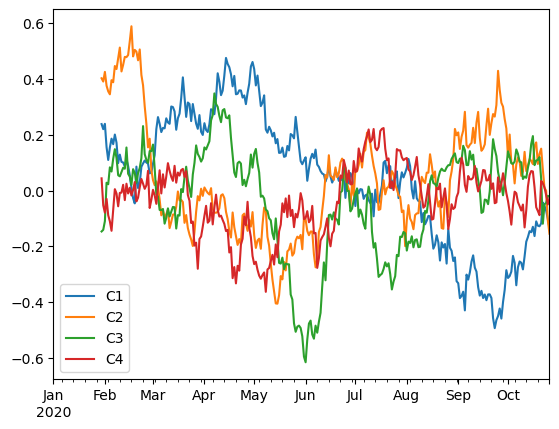

In [437]:
df.rolling(30).mean().plot()

<AxesSubplot: >

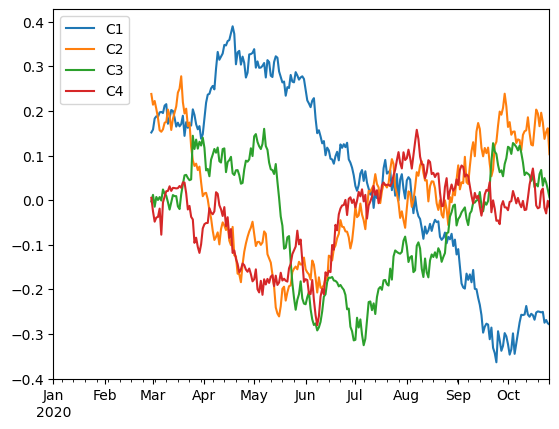

In [438]:
df.rolling(60).mean().plot()

<AxesSubplot: >

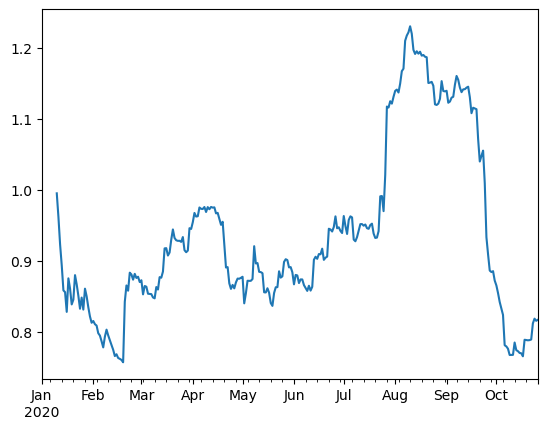

In [439]:
df.C1.rolling(60,min_periods=10).std().plot() # 60개 주기지만, 데이터가 10개만 존재해도 NaN이 아닌 집계를 하고 싶을때

<AxesSubplot: >

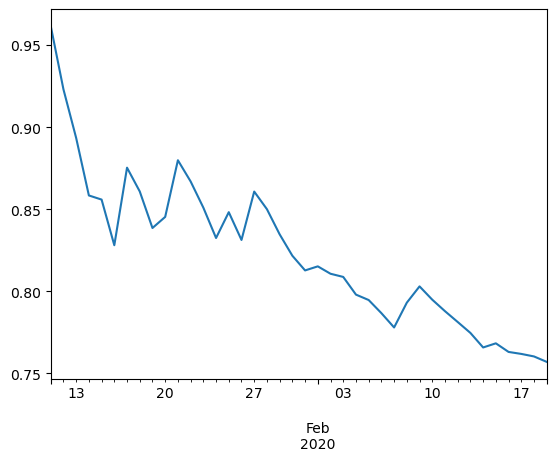

In [440]:
df.C1.rolling(60,min_periods=10).std()[10:50].plot() 

<AxesSubplot: >

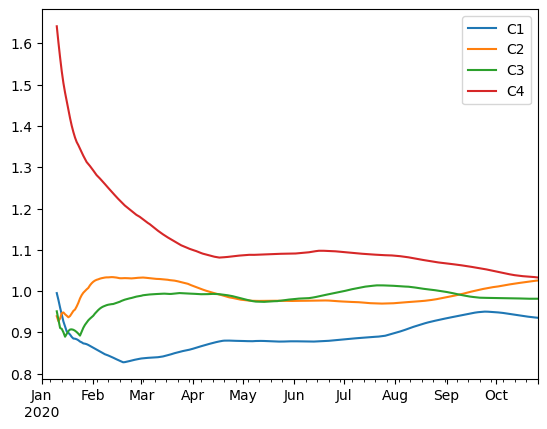

In [441]:
df.rolling(60,min_periods=10).std().expanding().mean().plot()
# expanding : 누적계산

<AxesSubplot: >

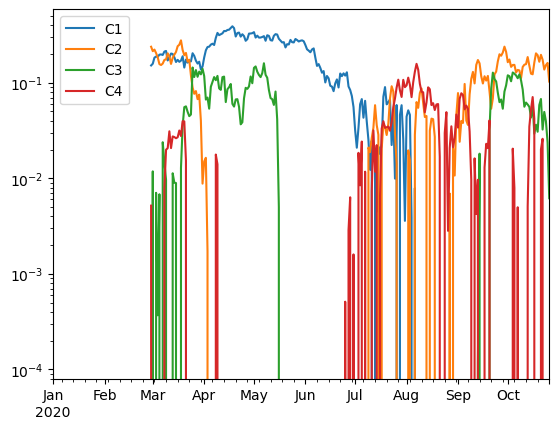

In [442]:
df.rolling(60).mean().plot(logy=True)

<AxesSubplot: >

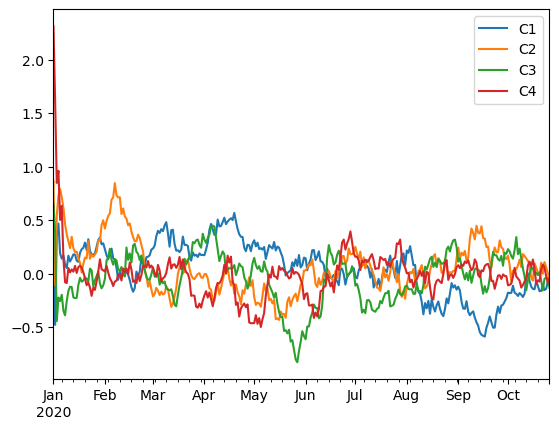

In [443]:
df.rolling('20D').mean().plot()

<AxesSubplot: >

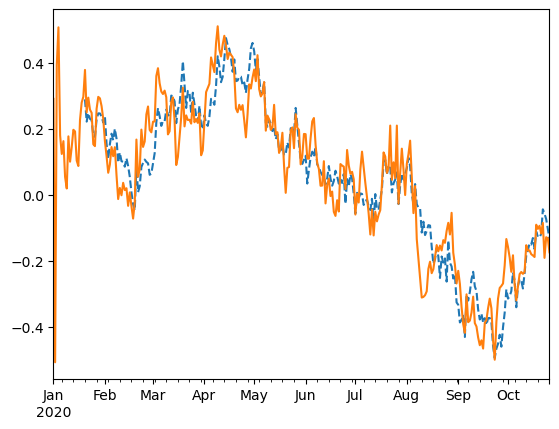

In [444]:
df.C1.rolling(30,min_periods=20).mean().plot(style='--',label = 'Simple MA')
df.C1.ewm(span=30).mean().plot(style = '-', label = 'EWMA')

<AxesSubplot: >

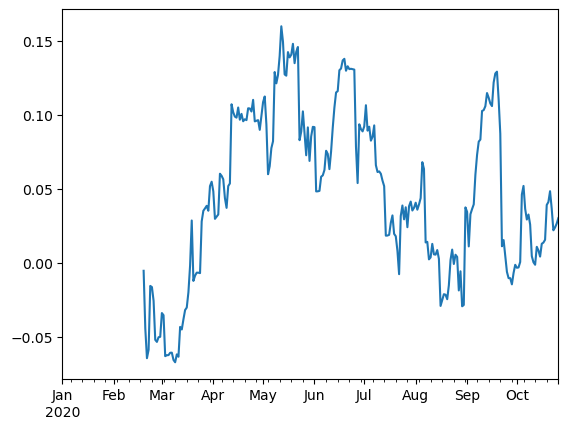

In [445]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

<AxesSubplot: >

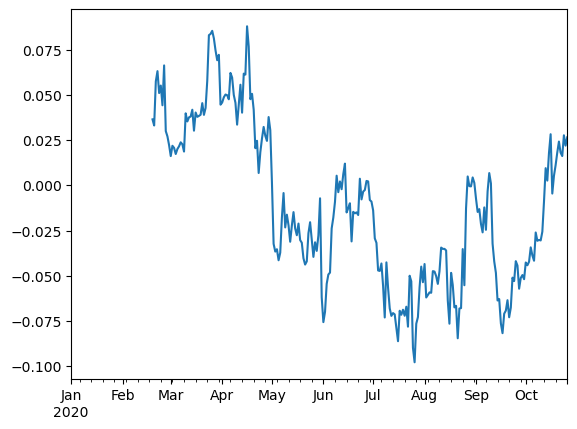

In [446]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()

## 데이터 읽기 및 저장

|함수|설명|
|---|---|
|read_csv|파일,URL,객체로부터 구분된 데이터 읽기(기본 구분자: ',')|
|read_table|파일,URL,객체로부터 구분된 데이터 읽기(기본 구분자:'\t')|
|read_fwf|고정폭 컬럼 형식에서 데이터 읽기(구분자 없는 데이터)|
|read_clipboard|클립보드에 있는 데이터 읽기. 웹페이제 있는 표를 읽어올 때 유용|
|read_excel|엑셀 파일(xls,xlsx)에서 표 형식 데이터 읽기|
|read_hdf|Pandas에서 저장한 HDFS파일의 데이터 읽기|
|read_json|JSON에서 데이터 읽기|
|read_msgpack|메시지팩 파이너리 포맷으로 인코딩된 Pandas 데이터 읽기|
|read_pickle|파이썬 피클 포맷으로 저장된 객체 읽기|
|read_sas|SAS시스템의 사용자 정의 저장 포맷 데이터 읽기|
|read_sql|SQL 질의 결과를 DataFrame 형식으로 읽기|
|read_stata|Stata 파일에서 데이터 읽기|
|read_feather|Feather 바이너리 파일 포맷의 데이터 읽기|




### 텍스트 파일 읽기/쓰기

In [447]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv


Overwriting example1.csv


In [448]:
!ls

Pandas_1.ipynb example1.csv   example4.csv   output.csv
df_pickle      example2.csv   example5.csv   output.json
example.json   example3.txt   example6.csv   ts.csv


In [449]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [450]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example2.csv


In [451]:
#헤더가 없는 경우
pd.read_csv('example2.csv',header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [452]:
pd.read_csv('example2.csv', names=['a','b','c','d','e','text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [453]:
pd.read_csv('example2.csv', names=['a','b','c','d','e','text'],index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [454]:
%%writefile example3.txt
    a   b   c
1   0.1 0.2 0.3
2   0.4 0.5 0.6
3   0.7 0.8 0.9

Overwriting example3.txt


In [455]:
pd.read_table('example3.txt', sep='\s+') # \s+ 여러 공백으로 파싱

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [456]:
%%writefile example4.csv
#파일 설명
a, b, c, d, e, text
# 칼럼은 a,b,c,d,e,e와 text 가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example4.csv


In [457]:
pd.read_csv('example4.csv',skiprows=[0,2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [458]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Overwriting example5.csv


In [459]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv


In [460]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv


Overwriting example6.csv


In [461]:
pd.read_csv('example6.csv', nrows=5)

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,a,b,c,d,e,text
4,1,2,3,4,5,hi


In [462]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,a,b,c,d,e,text
4,1,2,3,4,5,hi
5,6,7,8,9,10,pandas
6,11,12,13,14,15,csv
7,a,b,c,d,e,text
8,1,2,3,4,5,hi
9,6,7,8,9,10,pandas


In [463]:
df.to_csv('output.csv') #저장 

In [464]:
!cat output.csv

,a, b, c, d, e, text
0,1, 2, 3, 4, 5, hi
1,6, 7, 8, 9, 10, pandas
2,11, 12, 13, 14, 15, csv
3,a, b, c, d, e, text
4,1, 2, 3, 4, 5, hi
5,6, 7, 8, 9, 10, pandas
6,11, 12, 13, 14, 15, csv
7,a, b, c, d, e, text
8,1, 2, 3, 4, 5, hi
9,6, 7, 8, 9, 10, pandas
10,11, 12, 13, 14, 15, csv
11,a, b, c, d, e, text
12,1, 2, 3, 4, 5, hi
13,6, 7, 8, 9, 10, pandas
14,11, 12, 13, 14, 15, csv
15,a, b, c, d, e, text
16,1, 2, 3, 4, 5, hi
17,6, 7, 8, 9, 10, pandas
18,11, 12, 13, 14, 15, csv


In [465]:
dr = pd.date_range('2020-01-01',periods=10)
ts = pd.Series(np.arange(10),index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

In [466]:
ts.to_csv('ts.csv',header=['value'])

In [467]:
!cat ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [468]:
%%writefile example.json
[{"a" : 1, "b" : 2, "c" : 3, "d" : 4, "e" : 5},
 {"a" : 6, "b" : 7, "c" : 8, "d" : 9, "e" : 10},
 {"a" : 11, "b" : 12, "c" : 13, "d" : 14, "e" : 15}]

Overwriting example.json


In [469]:
!cat example.json

[{"a" : 1, "b" : 2, "c" : 3, "d" : 4, "e" : 5},
 {"a" : 6, "b" : 7, "c" : 8, "d" : 9, "e" : 10},
 {"a" : 11, "b" : 12, "c" : 13, "d" : 14, "e" : 15}]


In [470]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [471]:
ts.to_json("output.json")

In [472]:
!cat output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}

In [473]:
df.to_json("output.json")

In [474]:
!cat output.json

{"a":{"0":"1","1":"6","2":"11","3":"a","4":"1","5":"6","6":"11","7":"a","8":"1","9":"6","10":"11","11":"a","12":"1","13":"6","14":"11","15":"a","16":"1","17":"6","18":"11"}," b":{"0":" 2","1":" 7","2":" 12","3":" b","4":" 2","5":" 7","6":" 12","7":" b","8":" 2","9":" 7","10":" 12","11":" b","12":" 2","13":" 7","14":" 12","15":" b","16":" 2","17":" 7","18":" 12"}," c":{"0":" 3","1":" 8","2":" 13","3":" c","4":" 3","5":" 8","6":" 13","7":" c","8":" 3","9":" 8","10":" 13","11":" c","12":" 3","13":" 8","14":" 13","15":" c","16":" 3","17":" 8","18":" 13"}," d":{"0":" 4","1":" 9","2":" 14","3":" d","4":" 4","5":" 9","6":" 14","7":" d","8":" 4","9":" 9","10":" 14","11":" d","12":" 4","13":" 9","14":" 14","15":" d","16":" 4","17":" 9","18":" 14"}," e":{"0":" 5","1":" 10","2":" 15","3":" e","4":" 5","5":" 10","6":" 15","7":" e","8":" 5","9":" 10","10":" 15","11":" e","12":" 5","13":" 10","14":" 15","15":" e","16":" 5","17":" 10","18":" 15"}," text":{"0":" hi","1":" pandas","2":" csv","3":" text

### 이진 데이터 파일 읽기/쓰기

In [475]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [476]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [480]:
df.to_excel('example.xlsx','Sheet1')

In [481]:
!ls

Pandas_1.ipynb example.xlsx   example3.txt   example6.csv   ts.csv
df_pickle      example1.csv   example4.csv   output.csv
example.json   example2.csv   example5.csv   output.json


In [482]:
pd.read_excel('example.xlsx','Sheet1')

,Unnamed: 0,a,b,c
0,0,-2.333511,-2.035758,0.492810
1,1,0.356702,1.024060,1.408415
2,2,0.122854,1.016084,-1.135044
3,3,-0.401570,-0.159311,2.348266
4,4,-1.401627,-0.822255,0.756774
...,...,...,...,...
95,95,0.193249,-0.711823,0.833716
96,96,0.102635,0.401223,-0.093332
97,97,0.729954,0.859601,-1.384495
98,98,-1.081358,-1.084516,-0.462258


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [484]:
a = np.array([1,2,None,4,5])
a

array([1, 2, None, 4, 5], dtype=object)

In [487]:
#a.sum()

#### NaN: 누락된 수치 데이터

In [490]:
a = np.array([1,2,np.nan,4,5]) # np.nan은 float 값
a.dtype

dtype('float64')

In [491]:
np.nan + np.nan

nan

In [492]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [493]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [494]:
pd.Series([1,2,np.nan,4,None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [495]:
s = pd.Series(range(5),dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [496]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [497]:
s[3] = np.nan

In [499]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리

- is_null() : 누락되거나 NA인 값을 불리언 값으로 반환
- notnull() : isnull()의 반대
- dropna() : 누락된 데이터가 있는 축 제외
- fillna() : 누락된 값을 대체하거나 ffill 이나 bfill 보간 메소드 적용

In [501]:
s = pd.Series([1,2,np.nan, 'String',None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [502]:
s.isnull()


0    False
1    False
2     True
3    False
4     True
dtype: bool

In [504]:
s[s.notnull()] ## boolean indexing

0         1
1         2
3    String
dtype: object

In [505]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [506]:
df.dropna(axis='columns')

,a,b,c
0,-2.333511,-2.035758,0.492810
1,0.356702,1.024060,1.408415
2,0.122854,1.016084,-1.135044
3,-0.401570,-0.159311,2.348266
4,-1.401627,-0.822255,0.756774
...,...,...,...
95,0.193249,-0.711823,0.833716
96,0.102635,0.401223,-0.093332
97,0.729954,0.859601,-1.384495
98,-1.081358,-1.084516,-0.462258


In [508]:
df[3] = np.nan
df

,a,b,c,3
0,-2.333511,-2.035758,0.492810,NaN
1,0.356702,1.024060,1.408415,NaN
2,0.122854,1.016084,-1.135044,NaN
3,-0.401570,-0.159311,2.348266,NaN
4,-1.401627,-0.822255,0.756774,NaN
...,...,...,...,...
95,0.193249,-0.711823,0.833716,NaN
96,0.102635,0.401223,-0.093332,NaN
97,0.729954,0.859601,-1.384495,NaN
98,-1.081358,-1.084516,-0.462258,NaN


In [510]:
df.dropna(axis='columns', how='all')

,a,b,c
0,-2.333511,-2.035758,0.492810
1,0.356702,1.024060,1.408415
2,0.122854,1.016084,-1.135044
3,-0.401570,-0.159311,2.348266
4,-1.401627,-0.822255,0.756774
...,...,...,...
95,0.193249,-0.711823,0.833716
96,0.102635,0.401223,-0.093332
97,0.729954,0.859601,-1.384495
98,-1.081358,-1.084516,-0.462258


In [511]:
df.dropna(axis='rows', thresh=3)

,a,b,c,3
0,-2.333511,-2.035758,0.492810,NaN
1,0.356702,1.024060,1.408415,NaN
2,0.122854,1.016084,-1.135044,NaN
3,-0.401570,-0.159311,2.348266,NaN
4,-1.401627,-0.822255,0.756774,NaN
...,...,...,...,...
95,0.193249,-0.711823,0.833716,NaN
96,0.102635,0.401223,-0.093332,NaN
97,0.729954,0.859601,-1.384495,NaN
98,-1.081358,-1.084516,-0.462258,NaN


In [512]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [513]:
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [514]:
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [515]:
df

,a,b,c,3
0,-2.333511,-2.035758,0.492810,NaN
1,0.356702,1.024060,1.408415,NaN
2,0.122854,1.016084,-1.135044,NaN
3,-0.401570,-0.159311,2.348266,NaN
4,-1.401627,-0.822255,0.756774,NaN
...,...,...,...,...
95,0.193249,-0.711823,0.833716,NaN
96,0.102635,0.401223,-0.093332,NaN
97,0.729954,0.859601,-1.384495,NaN
98,-1.081358,-1.084516,-0.462258,NaN


In [518]:
df.fillna(method='ffill',axis=0)

,a,b,c,3
0,-2.333511,-2.035758,0.492810,NaN
1,0.356702,1.024060,1.408415,NaN
2,0.122854,1.016084,-1.135044,NaN
3,-0.401570,-0.159311,2.348266,NaN
4,-1.401627,-0.822255,0.756774,NaN
...,...,...,...,...
95,0.193249,-0.711823,0.833716,NaN
96,0.102635,0.401223,-0.093332,NaN
97,0.729954,0.859601,-1.384495,NaN
98,-1.081358,-1.084516,-0.462258,NaN


In [519]:
df.fillna(method='ffill',axis=1)

,a,b,c,3
0,-2.333511,-2.035758,0.492810,0.492810
1,0.356702,1.024060,1.408415,1.408415
2,0.122854,1.016084,-1.135044,-1.135044
3,-0.401570,-0.159311,2.348266,2.348266
4,-1.401627,-0.822255,0.756774,0.756774
...,...,...,...,...
95,0.193249,-0.711823,0.833716,0.833716
96,0.102635,0.401223,-0.093332,-0.093332
97,0.729954,0.859601,-1.384495,-1.384495
98,-1.081358,-1.084516,-0.462258,-0.462258


In [520]:
df.fillna(method='bfill',axis=0)

,a,b,c,3
0,-2.333511,-2.035758,0.492810,NaN
1,0.356702,1.024060,1.408415,NaN
2,0.122854,1.016084,-1.135044,NaN
3,-0.401570,-0.159311,2.348266,NaN
4,-1.401627,-0.822255,0.756774,NaN
...,...,...,...,...
95,0.193249,-0.711823,0.833716,NaN
96,0.102635,0.401223,-0.093332,NaN
97,0.729954,0.859601,-1.384495,NaN
98,-1.081358,-1.084516,-0.462258,NaN


In [521]:
df.fillna(method='bfill',axis=1)

,a,b,c,3
0,-2.333511,-2.035758,0.492810,NaN
1,0.356702,1.024060,1.408415,NaN
2,0.122854,1.016084,-1.135044,NaN
3,-0.401570,-0.159311,2.348266,NaN
4,-1.401627,-0.822255,0.756774,NaN
...,...,...,...,...
95,0.193249,-0.711823,0.833716,NaN
96,0.102635,0.401223,-0.093332,NaN
97,0.729954,0.859601,-1.384495,NaN
98,-1.081358,-1.084516,-0.462258,NaN


### 중복 제거

In [526]:
df = pd.DataFrame({'c1':['a','b','c'] * 2 + ['b'] + ['c'],
                   'c2':[1,2,1,1,2,3,3,4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [527]:
df.duplicated() # 중복 여부를 Bollean으로 반환

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [528]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [530]:
s = pd.Series([1.,2.,-999., 3.,-1000.,4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [531]:
s.replace(-999,np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [532]:
s.replace([-999,-1000],np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [533]:
s.replace([-999,-1000],[np.nan,0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly